# Data

In [1]:
import tensorflow as tf
import keras
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda
import keras.backend as K
from keras.utils import plot_model
from keras.models import Model

# import mnist dataset
from tensorflow.keras.datasets import mnist

from resnet import ResNet18
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')


# set the colormap.
plt.rc("image",cmap="gray")

(28, 28)

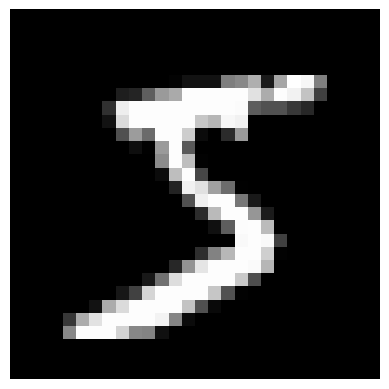

In [2]:
# example image
plt.imshow(tf.squeeze(X_train[0]))
plt.axis("off")

# get the input shape
data_input_shape = X_train[0].shape
data_input_shape

### RESNET-18

In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2,shuffle = True)
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

In [4]:
earlystop = keras.callbacks.EarlyStopping(
    min_delta=0.01,
    restore_best_weights=True,
    patience=3,
)

In [5]:
resnet_18 = ResNet18()
resnet_18(tf.zeros([1, 28,28,1]), training = True)
resnet_18.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
resnet_18.summary()

Model: "res_net18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_conv2d (MyConv2D)            │ ?                      │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block (ResidualBlock)  │ ?                      │        74,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_1                │ ?                      │        74,368 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_2                │ ?                      │       231,296 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_3                │ ?                      │       296,192 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_4                │ ?                      │       921,344 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_5                │ ?                      │     1,182,208 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_6                │ ?                      │     3,677,696 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_7                │ ?                      │     4,723,712 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,189,770 (42.69 MB)

 Trainable params: 11,180,170 (42.65 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_train.shape


(48000, 28, 28, 1)

In [7]:
x_train.shape

(48000, 28, 28, 1)

In [8]:
y_train_encoded.shape

(48000, 10)

In [9]:
#history = resnet_18.fit(x_train, y_train_encoded, batch_size=1024,epochs=10, validation_data=(x_val, y_val_encoded), callbacks=[earlystop])

In [10]:
# # plot the training history
# plt.plot(history.history["loss"], label="train_loss")
# plt.plot(history.history["val_loss"], label="val_loss")
# plt.title("Loss vs Epochs")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()


NameError: name 'history' is not defined

In [11]:
# test the model
x_test = X_test.reshape(-1, 28, 28, 1)
y_test_encoded = to_categorical(Y_test)
y_pred = resnet_18.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


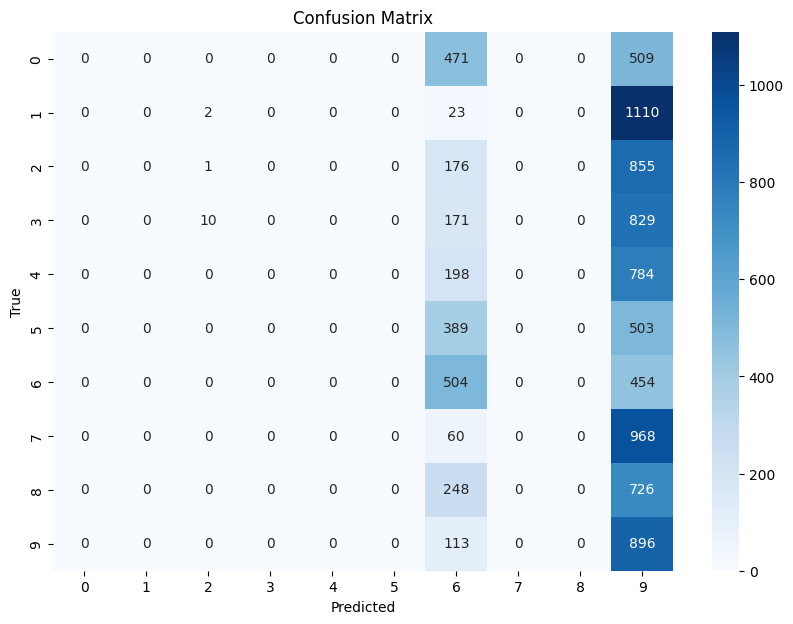

In [12]:

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

y_pred = resnet_18.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = Y_test.astype("int")
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=range(10), columns=range(10))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.1401


In [14]:
y_pred

array([9, 6, 9, ..., 9, 9, 6], dtype=int64)

# FSL

In [15]:
def triplet_loss(margin=1):
    """
    A function that returns the triplet loss function.
    """
    def _triplet_loss(_, y_pred):
        # get the anchor, positive and negative embeddings
        anchor, positive, negative = y_pred[:,0], y_pred[:,1], y_pred[:,2]
        # calculate the distance between the anchor and the positive
        positive_distance = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
        negative_distance = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
        # return the triplet loss
        return tf.maximum(positive_distance - negative_distance + margin, 0)
    return _triplet_loss

def get_triplets(x, y, n_classes, n_samples):
    triplets = []
    # create an array of labels
    labels = np.arange(n_classes)
    for label in labels:
        # get the indices of images belongs the current class
        class_indices = np.where(y == label)[0]
        # Labels of all other classes
        other_indices = np.where(y != label)[0]

        for i in range(n_samples):
            # Select an anchor from the current class
            anchor_index = class_indices[i% len(class_indices)]

            # Select a positive sample from the current class
            positive_index = class_indices[(i+1) % len(class_indices)]

            # Select a negative sample from the other classes
            negative_index = np.random.choice(other_indices)

            # Append the triplet to the triplets list
            triplets.append([x[anchor_index], x[positive_index], x[negative_index]])

    return np.array(triplets)

def classify_query(support_embedding, query_embeddings, support_labels):
    """
    A function that classifies a query image based on the support set.
    """
    # calculate the distance between the query image and the support images
    print(support_embedding.shape)
    print(query_embeddings.shape)

    

    
    distances = np.sum(np.square(support_embedding - query_embeddings), axis=-1)
    # get the index of the support image with the minimum distance
    nearest_indices = np.argmin(distances, axis=0)
    # return the labels of the nearest support images
    print(nearest_indices)
    return support_labels[nearest_indices]


In [16]:
from resnet_fsl_efe import ResNet18_fsl

base_model = ResNet18_fsl()

input_shape = (28, 28, 1)

# define inputs for triplet loss function

anchor_input = Input(input_shape, name="anchor_input")
positive_input = Input(input_shape, name="positive_input")
negative_input = Input(input_shape, name="negative_input")


# Process each input through the same base network (ResNet18)

encoded_anchor = base_model(anchor_input)
encoded_positive = base_model(positive_input)
encoded_negative = base_model(negative_input)

out = Lambda(lambda x: tf.stack(x, axis=1),output_shape=(3,512))([encoded_anchor, encoded_positive, encoded_negative])

# define the triplet network

triplet_network = Model(inputs=[anchor_input, positive_input, negative_input], outputs=out)

triplet_network.compile(optimizer="adam", loss=triplet_loss())

triplet_network.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ anchor_input        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positive_input      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ negative_input      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_net18_fsl       │ (None, 512)       │ 11,184,640 │ anchor_input[0][… │
│ (ResNet18_fsl)      │                   │            │ positive_input[0… │
│                     │                   │            │ negative_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 3, 512)    │          0 │ res_net18_fsl[0]… │
│                     │                   │            │ res_net18_fsl[1]… │
│                     │                   │            │ res_net18_fsl[2]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,184,640 (42.67 MB)

 Trainable params: 11,175,040 (42.63 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [17]:
n_classes = 10
n_samples = 60 # number of samples per class

# get the triplets
triplet_pairs = get_triplets(x_train, x_train, n_classes, n_samples)
y_dummy = np.zeros((len(triplet_pairs)))

anchors = triplet_pairs[:, 0]
positives = triplet_pairs[:, 1]
negatives = triplet_pairs[:, 2]

# train the triplet network
triplet_network.fit([anchors, positives, negatives], y_dummy, batch_size=128, epochs=5)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 424ms/step - loss: 59.8276
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - loss: 4.9895
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - loss: 0.3678
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 421ms/step - loss: 0.0362
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - loss: 0.0000e+00


In [18]:
n = 10 
k = 3 # support vector size

# get the support set
def get_random_support(model,x, y ,n ,k):

    support_set = []
    for i in range(n):
        # get the indices of images belongs the current class
        class_indices = np.where(y == i)[0]

        # select k random samples from the current class
        support_indices = np.random.choice(class_indices, k, replace=False)
        
        # append the support set
        feature = model.predict([x[support_indices], x[support_indices], x[support_indices]])[0]
        
        mean_feature = tf.reduce_mean(feature, axis=0)
        mean_feature = mean_feature / tf.norm(mean_feature)
        
        support_set.append(mean_feature)
        
    return np.array(support_set)

support_set = get_random_support(triplet_network,x_train, y_train, n, k)
print(support_set.shape)




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
(10, 512)


In [19]:
# query image
query_image = x_test[0:500]


# get the feature of the query image
feature = triplet_network.predict([query_image, query_image,query_image])

print(feature.shape)
feature = feature[:,0,:]
feature = feature / tf.norm(feature)


# classify the query image
predicted_label = classify_query(support_set, feature, np.arange(n))
print(f"Predicted Label: {predicted_label}, Actual Label: {y_test}")
# plot the query image

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
(500, 3, 512)
(10, 512)
(500, 512)


InvalidArgumentError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [10,512] vs. [500,512] [Op:Sub] name: 

In [21]:
support_set.shape

(10, 512)

In [25]:
feature.shape

TensorShape([500, 512])

In [30]:
# calculate euclidian distance

def distance(x, y):
    return np.sum(np.square(x - y), axis=-1)

In [32]:
predictions = []
for row in feature:
    distances = []
    for support in support_set:
        distances.append(distance(row, support))
    prediction = np.argmin(distances)
    predictions.append(prediction)

predictions = np.array(predictions)
